# CALIBRATION

In [504]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit import models

## Opening files

In [505]:


# Importing Data
x = []
y = []

# Open file in read mode
with open("../251119 Natrium 22 calibratie.csv", "r", newline="") as file:
    # Skip header
    next(file)

    for line in file:
        # split column
        line_splitted = line.split(",")
        x.append(float(line_splitted[0]))
        y.append(float(line_splitted[1]))

# Convert lists to numpy arrays
x_array = np.array(x)
y_array = np.array(y)



## Define ranges of masked / unmasked ranges

In [506]:
# Define the two unmasked x-ranges
x_min_na1, x_max_na1 = 197, 210
x_min_na2, x_max_na2 = 500, 512

# Create boolean masks for each unmasked range
mask_range_na1 = (x_array >= x_min_na1) & (x_array <= x_max_na1)
mask_range_na2 = (x_array >= x_min_na2) & (x_array <= x_max_na2)

# Combine both unmasked ranges
unmasked_mask = mask_range_na1 | mask_range_na2

# Masked = everything outside both ranges
masked_mask = ~unmasked_mask

# Separate data for plotting/fitting
x_selection_na1 = x_array[mask_range_na1]
y_selection_na1 = y_array[mask_range_na1]

x_selection_na2 = x_array[mask_range_na2]
y_selection_na2 = y_array[mask_range_na2]

x_masked = x_array[masked_mask]
y_masked = y_array[masked_mask]


## Fit to Gaussian funtion

In [507]:
# --- Fit Gaussian to first range (Na-22 Peak 1) ---
gauss_na1 = models.GaussianModel(prefix='g_na1_')
pars_na1 = gauss_na1.guess(y_selection_na1, x=x_selection_na1)
result_na1 = gauss_na1.fit(y_selection_na1, pars_na1, x=x_selection_na1)

print(x_selection_na1)
print(y_selection_na1)
print(max(y_selection_na1))

# --- Fit Gaussian to second range (Na-22 Peak 2) ---
gauss_na2 = models.GaussianModel(prefix="g_na2_")
pars_na2 = gauss_na2.guess(y_selection_na2, x=x_selection_na2)
result_na2 = gauss_na2.fit(y_selection_na2, pars_na2, x=x_selection_na2)


[198.03921569 201.96078431 205.88235294 209.80392157]
[ 35. 312. 342.  26.]
342.0


## Creating Plot with Gaussian fits

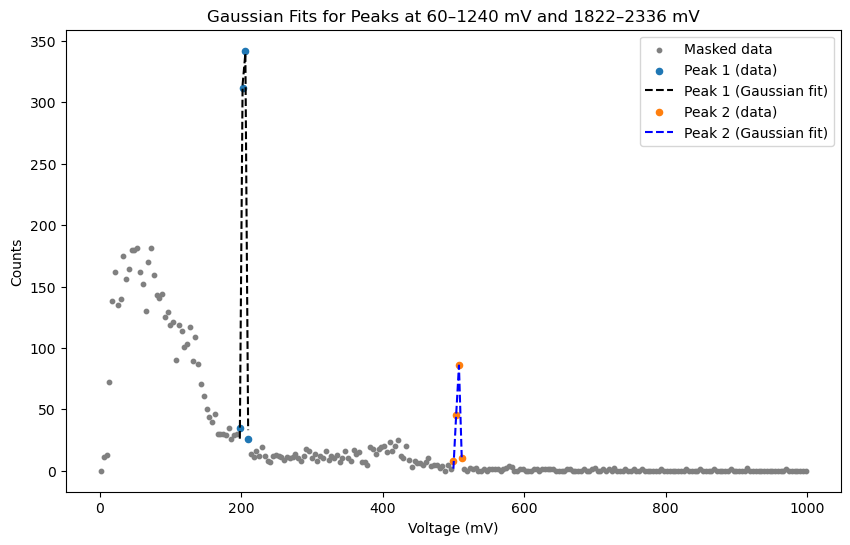

In [508]:
plt.figure(figsize=(10, 6))

# Masked data (outside both peaks)
plt.scatter(x_masked, y_masked, color="grey", label="Masked data", s=10)

# Unmasked and fitted data for each peak
plt.scatter(x_selection_na1, y_selection_na1, label="Peak 1 (data)", s=20)
plt.plot(x_selection_na1, result_na1.best_fit, "k--", label="Peak 1 (Gaussian fit)")

plt.scatter(x_selection_na2, y_selection_na2, label="Peak 2 (data)", s=20)
plt.plot(x_selection_na2, result_na2.best_fit, "b--", label="Peak 2 (Gaussian fit)")

plt.xlabel("Voltage (mV)")
plt.ylabel("Counts")
plt.title("Gaussian Fits for Peaks at 60–1240 mV and 1822–2336 mV")
plt.legend()
plt.show()


## Fit result

In [509]:
print("\n=== Gaussian Fit 1 (60–1240 mV) ===")
print(result_na1.fit_report())

print("\n=== Gaussian Fit 2 (1822–2336 mV) ===")
print(result_na2.fit_report())



=== Gaussian Fit 1 (60–1240 mV) ===
[[Model]]
    Model(gaussian, prefix='g_na1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 4
    # variables        = 3
    chi-square         = 138.056715
    reduced chi-square = 138.056715
    Akaike info crit   = 20.1654809
    Bayesian info crit = 18.3243640
    R-squared          = 0.99843832
[[Variables]]
    g_na1_amplitude:  2800.64684 +/- 92.0852462 (3.29%) (init = 1858.824)
    g_na1_center:     204.049640 +/- 0.08065473 (0.04%) (init = 205.8824)
    g_na1_sigma:      2.52617254 +/- 0.14710752 (5.82%) (init = 1.960784)
    g_na1_fwhm:       5.94868162 +/- 0.34641174 (5.82%) == '2.3548200*g_na1_sigma'
    g_na1_height:     442.288273 +/- 19.8969347 (4.50%) == '0.3989423*g_na1_amplitude/max(1e-15, g_na1_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(g_na1_amplitude, g_na1_sigma) = +0.6394
    C(g_na1_center, g_na1_sigma)    = +0.1310

=== Gaussian Fit 2 (1822

Lineaire fit

## Cesium fit and fit results + resolution

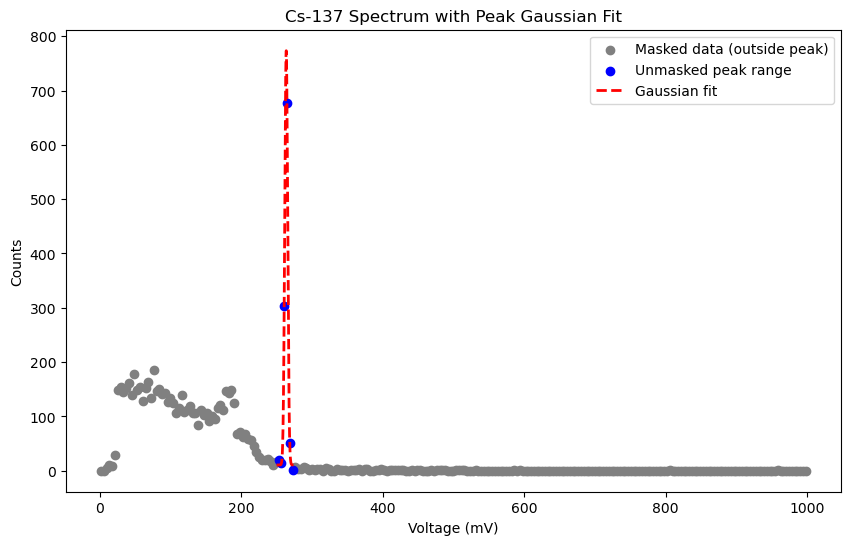

[[Model]]
    (Model(gaussian, prefix='cs_') + Model(constant, prefix='bkg_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58
    # data points      = 6
    # variables        = 4
    chi-square         = 145.605815
    reduced chi-square = 72.8029076
    Akaike info crit   = 27.1348616
    Bayesian info crit = 26.3018995
    R-squared          = 0.99959988
[[Variables]]
    cs_amplitude:  3937.81834 +/- 85.1730956 (2.16%) (init = 677)
    cs_center:     263.635939 +/- 0.06206928 (0.02%) (init = 264.7059)
    cs_sigma:      2.05953907 +/- 0.07241945 (3.52%) (init = 4)
    bkg_c:         10.5161644 +/- 5.11272170 (48.62%) (init = 2)
    cs_fwhm:       4.84984380 +/- 0.17053476 (3.52%) == '2.3548200*cs_sigma'
    cs_height:     762.773733 +/- 18.8652705 (2.47%) == '0.3989423*cs_amplitude/max(1e-15, cs_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(cs_center, cs_sigma)     = +0.8310
    C(cs_amplitude, bkg_c)     = -0.7312
    C(cs_am

In [510]:
# --- Opening File for Cs-137 ---
cs_voltage = []
cs_counts = []

with open("../251119 Cesium 137 calibratie.csv", "r", newline="") as file:
    next(file)
    for line in file:
        parts = line.split(",")
        cs_voltage.append(float(parts[0]))
        cs_counts.append(float(parts[1]))

cs_voltage_array = np.array(cs_voltage)
cs_counts_array = np.array(cs_counts)

# --- Define the unmasked peak range ---
cs_peak_min, cs_peak_max = 250, 274
peak_mask = (cs_voltage_array >= cs_peak_min) & (cs_voltage_array <= cs_peak_max)

# Masked = everything outside the peak range
masked_mask = ~peak_mask

# Separate masked/unmasked data
cs_voltage_unmasked = cs_voltage_array[peak_mask]
cs_counts_unmasked = cs_counts_array[peak_mask]

cs_voltage_masked = cs_voltage_array[masked_mask]
cs_counts_masked = cs_counts_array[masked_mask]

# --- Gaussian + baseline fit for unmasked peak ---
gauss_cs = models.GaussianModel(prefix='cs_') + models.ConstantModel(prefix='bkg_')
params = gauss_cs.make_params()
params['cs_center'].set(value=cs_voltage_unmasked[np.argmax(cs_counts_unmasked)])
params['cs_sigma'].set(value=(cs_peak_max - cs_peak_min)/6, min=1)
params['cs_amplitude'].set(value=max(cs_counts_unmasked))
params['bkg_c'].set(value=min(cs_counts_unmasked))
result_cs = gauss_cs.fit(cs_counts_unmasked, params, x=cs_voltage_unmasked)

# --- Plot full spectrum ---
plt.figure(figsize=(10,6))

# Masked points (outside peak range)
plt.scatter(cs_voltage_masked, cs_counts_masked, color='grey', label='Masked data (outside peak)')

# Unmasked peak range
plt.scatter(cs_voltage_unmasked, cs_counts_unmasked, color='blue', label='Unmasked peak range')

# Gaussian fit line
x_fit = np.linspace(cs_peak_min, cs_peak_max, 500)
plt.plot(x_fit, gauss_cs.eval(result_cs.params, x=x_fit), 'r--', linewidth=2, label='Gaussian fit')

plt.xlabel("Voltage (mV)")
plt.ylabel("Counts")
plt.title("Cs-137 Spectrum with Peak Gaussian Fit")
plt.legend()
plt.show()

# --- Print fit report ---
print(result_cs.fit_report())


## Values for linear fit (literature)

In [511]:
peak_value_Na1 = 511
peak_value_Na2 = 1274.5
peak_value_Cs = 622

peak_values = [511, 622, 1274.5] # Peak values in keV - literature. 
# Order: sodium 2, cesium, sodium 1

sodium_center_1 = result_na1.params['g_na1_center'].value
sodium_center_2 = result_na2.params['g_na2_center'].value
cesium_center = result_cs.params['cs_center'].value

print(sodium_center_1, sodium_center_2, cesium_center)


centers = [sodium_center_1, cesium_center, sodium_center_2]

sodium_center_2_err = result_na1.params['g_na1_center'].stderr
sodium_center_1_err = result_na2.params['g_na2_center'].stderr
cesium_center_err = result_cs.params['cs_center'].stderr

print(centers)


204.04963977475123 506.8001806325965 263.63593888716605
[204.04963977475123, 263.63593888716605, 506.8001806325965]


## Linear fit

In [512]:
# create model
mod_linear = models.LinearModel()

y_err = [sodium_center_1_err, cesium_center_err, sodium_center_2_err]

print("Centers:", centers)
print("Errors:", y_err)

# initialize array and calculate weights
y_err_array = np.array(y_err)
y_inv_err = 1 / y_err_array

# use model to fit
fit_result = mod_linear.fit(peak_values, x = centers, weights=y_inv_err)

# print fit report
print(fit_result.fit_report())



Centers: [204.04963977475123, 263.63593888716605, 506.8001806325965]
Errors: [0.26247943834914533, 0.0620692817341873, 0.08065472549870456]
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 3
    # variables        = 2
    chi-square         = 31763.2798
    reduced chi-square = 31763.2798
    Akaike info crit   = 31.8023617
    Bayesian info crit = 29.9995862
    R-squared          = 0.99408199
[[Variables]]
    slope:      2.66629748 +/- 0.07261231 (2.72%) (init = 1)
    intercept: -77.8156442 +/- 26.7659434 (34.40%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9468


## Calibration graph - plot

Slope (m): 2.666297 ± 0.072612
Intercept (b): -77.815644 ± 26.765943


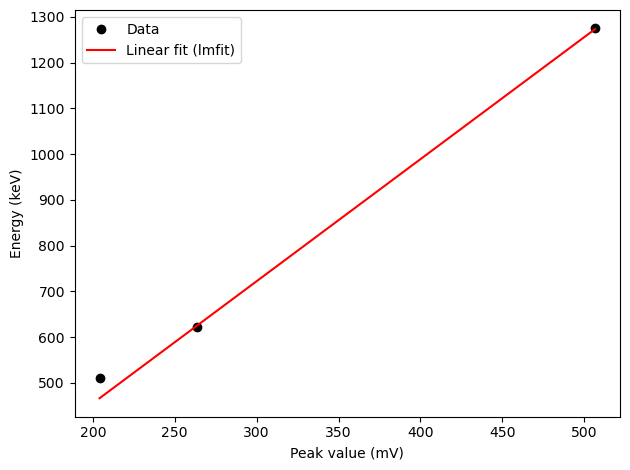

In [513]:
# --- Use slope and intercept from lmfit result ---
slope = fit_result.params['slope'].value
intercept = fit_result.params['intercept'].value
slope_err = fit_result.params['slope'].stderr
intercept_err = fit_result.params['intercept'].stderr

print(f"Slope (m): {slope:.6f} ± {slope_err:.6f}")
print(f"Intercept (b): {intercept:.6f} ± {intercept_err:.6f}")

# Generate fit line using lmfit slope/intercept
x_fit = np.linspace(min(centers), max(centers), 500)
y_fit = slope * x_fit + intercept

# --- Plot ---
plt.figure()
plt.plot(centers, peak_values, 'ko', label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Linear fit (lmfit)')
plt.xlabel("Peak value (mV)")
plt.ylabel("Energy (keV)")
plt.legend()
plt.tight_layout()
plt.savefig("Calibration_graph.png")
plt.show()




## Fit results Linear fit

In [514]:
# --- Extract slope and intercept from lmfit result ---
slope = fit_result.params['slope'].value
intercept = fit_result.params['intercept'].value
slope_err = fit_result.params['slope'].stderr
intercept_err = fit_result.params['intercept'].stderr

print("y = ax + b for a linear fit (from lmfit)")
print(f"a = Slope     = {slope:.6f} ± {slope_err:.6f} keV/mV")
print(f"b = Intercept = {intercept:.6f} ± {intercept_err:.6f} keV")


y = ax + b for a linear fit (from lmfit)
a = Slope     = 2.666297 ± 0.072612 keV/mV
b = Intercept = -77.815644 ± 26.765943 keV


## Resolutions + mean resolution

In [515]:
# === Resolution Calculation for Cs-137 + Na-22 Peaks ===

def compute_resolution(result, prefix):
    """Extract Gaussian parameters and compute FWHM & resolution."""
    center = result.params[f"{prefix}center"].value
    sigma  = result.params[f"{prefix}sigma"].value
    
    FWHM = 2.35482 * sigma
    resolution = FWHM / center
    resolution_pct = resolution * 100
    
    return center, sigma, FWHM, resolution, resolution_pct


# ---- Cs-137 ----
c_cs, s_cs, fwhm_cs, res_cs, res_cs_pct = compute_resolution(result_cs, "cs_")

print("===== Cs-137 Peak Resolution =====")
print(f"Center (mV):       {c_cs:.3f}")
print(f"Sigma:             {s_cs:.3f}")
print(f"FWHM (mV):         {fwhm_cs:.3f}")
print(f"Resolution:        {res_cs:.6f}")
print(f"Resolution (%):    {res_cs_pct:.3f}%\n")


# ---- Na-22 Peak 1 ----
c1, s1, fwhm1, res1, res1p = compute_resolution(result_na1, "g_na1_")

print("===== Na-22 Peak 1 Resolution =====")
print(f"Center (mV):       {c1:.3f}")
print(f"Sigma:             {s1:.3f}")
print(f"FWHM (mV):         {fwhm1:.3f}")
print(f"Resolution:        {res1:.6f}")
print(f"Resolution (%):    {res1p:.3f}%\n")


# ---- Na-22 Peak 2 ----
c2, s2, fwhm2, res2, res2p = compute_resolution(result_na2, "g_na2_")

print("===== Na-22 Peak 2 Resolution =====")
print(f"Center (mV):       {c2:.3f}")
print(f"Sigma:             {s2:.3f}")
print(f"FWHM (mV):         {fwhm2:.3f}")
print(f"Resolution:        {res2:.6f}")
print(f"Resolution (%):    {res2p:.3f}%")


# ---- Mean Resolution ----
resolutions = np.array([res_cs, res1, res2])

mean_resolution = np.mean(resolutions)
std_resolution  = np.std(resolutions, ddof=1)       # sample std
sem_resolution  = std_resolution / np.sqrt(len(resolutions))  # standard error of mean

print("===== Mean Detector Resolution =====")
print(f"Mean Resolution:           {mean_resolution:.6f}")
print(f"Standard Deviation:        {std_resolution:.6f}")
print(f"Standard Error (Error):    {sem_resolution:.6f}")
print(f"Mean Resolution (%):       {mean_resolution*100:.3f} ± {sem_resolution*100:.3f}%")


===== Cs-137 Peak Resolution =====
Center (mV):       263.636
Sigma:             2.060
FWHM (mV):         4.850
Resolution:        0.018396
Resolution (%):    1.840%

===== Na-22 Peak 1 Resolution =====
Center (mV):       204.050
Sigma:             2.526
FWHM (mV):         5.949
Resolution:        0.029153
Resolution (%):    2.915%

===== Na-22 Peak 2 Resolution =====
Center (mV):       506.800
Sigma:             2.394
FWHM (mV):         5.637
Resolution:        0.011123
Resolution (%):    1.112%
===== Mean Detector Resolution =====
Mean Resolution:           0.019557
Standard Deviation:        0.009071
Standard Error (Error):    0.005237
Mean Resolution (%):       1.956 ± 0.524%


# Data Analysis

## Opening file

In [516]:

# Importing Data
x = []
y = []

# Open file in read mode
with open("../251124 mushrooms 3 - 1 hr.csv", "r", newline="") as file:
    # Skip header
    next(file)

    for line in file:
        # split column
        line_splitted = line.split(",")
        x.append(float(line_splitted[0]))
        y.append(float(line_splitted[1]))

# Convert lists to numpy arrays
x_array = np.array(x)
y_array = np.array(y)


# Determining ranges

In [517]:
# Define the four unmasked x-ranges
x_min1, x_max1 = 195, 209
x_min2, x_max2 = 254, 268
x_min3, x_max3 = 496, 510
x_min4, x_max4 = 568, 583

# Create boolean masks for each unmasked range
mask_range1 = (x_array >= x_min1) & (x_array <= x_max1)
mask_range2 = (x_array >= x_min2) & (x_array <= x_max2)
mask_range3 = (x_array >= x_min3) & (x_array <= x_max3)
mask_range4 = (x_array >= x_min4) & (x_array <= x_max4)

# Combine all unmasked ranges
unmasked_mask = mask_range1 | mask_range2 | mask_range3 | mask_range4

# Masked = everything outside all four ranges
masked_mask = ~unmasked_mask

# Separate data for plotting/fitting
x_selection_1 = x_array[mask_range1]
y_selection_1 = y_array[mask_range1]

x_selection_2 = x_array[mask_range2]
y_selection_2 = y_array[mask_range2]

x_selection_3 = x_array[mask_range3]
y_selection_3 = y_array[mask_range3]

x_selection_4 = x_array[mask_range4]
y_selection_4 = y_array[mask_range4]

# Masked data
x_masked = x_array[masked_mask]
y_masked = y_array[masked_mask]


# Gaussian fits

In [518]:
# --- Fit Gaussian to first range ---
gauss1 = models.GaussianModel(prefix='g1_')
pars1 = gauss1.guess(y_selection_1, x=x_selection_1)
result1 = gauss1.fit(y_selection_1, pars1, x=x_selection_1)

print(x_selection_1)
print(y_selection_1)
print(max(y_selection_1))

# --- Fit Gaussian to second range ---
gauss2 = models.GaussianModel(prefix='g2_')
pars2 = gauss2.guess(y_selection_2, x=x_selection_2)
result2 = gauss2.fit(y_selection_2, pars2, x=x_selection_2)

# --- Fit Gaussian to third range ---
gauss3 = models.GaussianModel(prefix='g3_')
pars3 = gauss3.guess(y_selection_3, x=x_selection_3)
result3 = gauss3.fit(y_selection_3, pars3, x=x_selection_3)

# --- Fit Gaussian to fourth range ---
gauss4 = models.GaussianModel(prefix='g4_')
pars4 = gauss4.guess(y_selection_4, x=x_selection_4)
result4 = gauss4.fit(y_selection_4, pars4, x=x_selection_4)

[195.08196721 198.36065574 201.63934426 204.91803279 208.19672131]
[135. 143. 332. 303. 129.]
332.0


# PLOTS

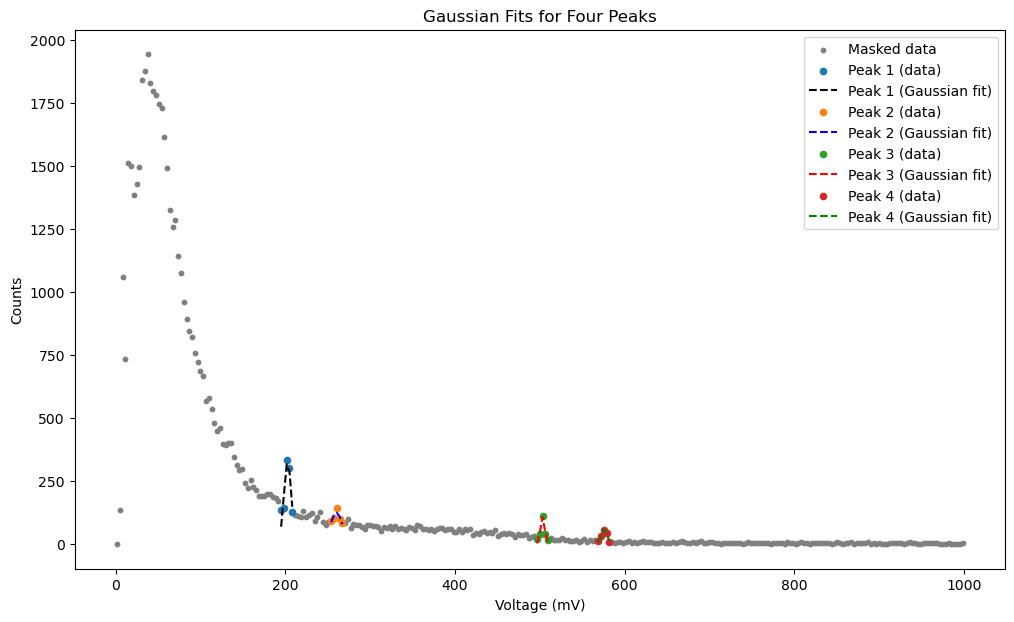

In [519]:
plt.figure(figsize=(12, 7))

# Masked data (everything outside the 4 peak ranges)
plt.scatter(x_masked, y_masked, color="grey", label="Masked data", s=10)

# === Peak 1 ===
plt.scatter(x_selection_1, y_selection_1, label="Peak 1 (data)", s=20)
plt.plot(x_selection_1, result1.best_fit, "k--", label="Peak 1 (Gaussian fit)")

# === Peak 2 ===
plt.scatter(x_selection_2, y_selection_2, label="Peak 2 (data)", s=20)
plt.plot(x_selection_2, result2.best_fit, "b--", label="Peak 2 (Gaussian fit)")

# === Peak 3 ===
plt.scatter(x_selection_3, y_selection_3, label="Peak 3 (data)", s=20)
plt.plot(x_selection_3, result3.best_fit, "r--", label="Peak 3 (Gaussian fit)")

# === Peak 4 ===
plt.scatter(x_selection_4, y_selection_4, label="Peak 4 (data)", s=20)
plt.plot(x_selection_4, result4.best_fit, "g--", label="Peak 4 (Gaussian fit)")

# Labels, title, legend
plt.xlabel("Voltage (mV)")
plt.ylabel("Counts")
plt.title("Gaussian Fits for Four Peaks")
plt.legend()
plt.savefig("plot_peaks.png")
plt.show()



# Fit results

In [520]:
print("\n=== Gaussian Fit 1 (Range 1) ===")
print(result1.fit_report())

print("\n=== Gaussian Fit 2 (Range 2) ===")
print(result2.fit_report())

print("\n=== Gaussian Fit 3 (Range 3) ===")
print(result3.fit_report())

print("\n=== Gaussian Fit 4 (Range 4) ===")
print(result4.fit_report())




=== Gaussian Fit 1 (Range 1) ===
[[Model]]
    Model(gaussian, prefix='g1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 5
    # variables        = 3
    chi-square         = 8055.30532
    reduced chi-square = 4027.65266
    Akaike info crit   = 42.9232414
    Bayesian info crit = 41.7515552
    R-squared          = 0.79959534
[[Variables]]
    g1_amplitude:  3566.59897 +/- 605.163317 (16.97%) (init = 1331.148)
    g1_center:     202.734302 +/- 0.81496721 (0.40%) (init = 201.6393)
    g1_sigma:      4.35285392 +/- 0.91528660 (21.03%) (init = 2.185792)
    g1_fwhm:       10.2501875 +/- 2.15533520 (21.03%) == '2.3548200*g1_sigma'
    g1_height:     326.881449 +/- 52.4519363 (16.05%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(g1_amplitude, g1_sigma) = +0.6623
    C(g1_center, g1_sigma)    = +0.1124

=== Gaussian Fit 2 (Range 2) ===
[[Model]]
    Model(gaussian,

# Plug into resolution relation

In [521]:
# Extract Gaussian centers from each fit
center1 = result1.params['g1_center'].value
center2 = result2.params['g2_center'].value
center3 = result3.params['g3_center'].value
center4 = result4.params['g4_center'].value

# Put all centers into xaxis
xaxis = [center1, center2, center3, center4]

print("Gaussian centers (x-axis values):", xaxis)

# Extract slope, intercept, and their errors
slope = fit_result.params['slope'].value
intercept = fit_result.params['intercept'].value
slope_err = fit_result.params['slope'].stderr
intercept_err = fit_result.params['intercept'].stderr

print("\ny = ax + b for a linear fit")
print(f"a = Slope = {slope:.6f} ± {slope_err:.6f}")
print(f"b = Intercept = {intercept:.6f} ± {intercept_err:.6f}")

# Compute predicted y values for each center
predicted_y = [slope * x + intercept for x in xaxis]

print("\nPredicted y-values for each center:")
for i, (x, y) in enumerate(zip(xaxis, predicted_y), start=1):
    print(f"  Center {i}: x = {x:.6f}, y = {y:.6f}")


Gaussian centers (x-axis values): [202.73430183296202, 260.2905313376183, 503.31008154709036, 575.9049208213175]

y = ax + b for a linear fit
a = Slope = 2.666297 ± 0.072612
b = Intercept = -77.815644 ± 26.765943

Predicted y-values for each center:
  Center 1: x = 202.734302, y = 462.734313
  Center 2: x = 260.290531, y = 616.196343
  Center 3: x = 503.310082, y = 1264.158757
  Center 4: x = 575.904921, y = 1457.718194


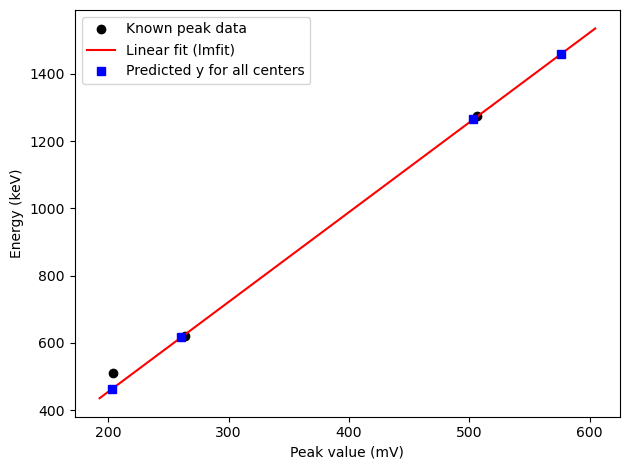

In [522]:
# --- Predicted y-values for all Gaussian centers ---
xaxis = [center1, center2, center3, center4]
predicted_y = [slope * x + intercept for x in xaxis]

# --- Generate extended fit line ---
x_min = min(min(centers), min(xaxis)) * 0.95
x_max = max(max(centers), max(xaxis)) * 1.05
x_fit = np.linspace(x_min, x_max, 500)
y_fit = slope * x_fit + intercept

# --- Plot ---
plt.figure()
plt.plot(centers, peak_values, 'ko', label='Known peak data')                # known peaks
plt.plot(x_fit, y_fit, 'r-', label='Linear fit (lmfit)')                     # extended fit line
plt.plot(xaxis, predicted_y, 'bs', label='Predicted y for all centers')      # predicted points
plt.xlabel("Peak value (mV)")
plt.ylabel("Energy (keV)")
plt.legend()
plt.tight_layout()
plt.savefig("Calibration_graph.png")
plt.show()


# Resolution (+mean)

In [523]:
# Resolution Calculation for Mushroom spectrum 

def compute_resolution(result, prefix):
    """Extract Gaussian parameters and compute FWHM & resolution."""
    center = result.params[f"{prefix}center"].value
    sigma  = result.params[f"{prefix}sigma"].value
    
    FWHM = 2.35482 * sigma
    resolution = FWHM / center
    resolution_pct = resolution * 100
    
    return center, sigma, FWHM, resolution, resolution_pct


# =========================
#     Known Peaks (3)
# =========================

# ---- Cs-137 ----
c_cs, s_cs, fwhm_cs, res_cs, res_cs_pct = compute_resolution(result_cs, "cs_")

print("===== Cs-137 Peak Resolution =====")
print(f"Center (mV):       {c_cs:.3f}")
print(f"Sigma:             {s_cs:.3f}")
print(f"FWHM (mV):         {fwhm_cs:.3f}")
print(f"Resolution:        {res_cs:.6f}")
print(f"Resolution (%):    {res_cs_pct:.3f}%\n")


# ---- Na-22 Peak 1 ----
c_na1, s_na1, fwhm_na1, res_na1, res_na1p = compute_resolution(result_na1, "g_na1_")

print("===== Na-22 Peak 1 Resolution =====")
print(f"Center (mV):       {c_na1:.3f}")
print(f"Sigma:             {s_na1:.3f}")
print(f"FWHM (mV):         {fwhm_na1:.3f}")
print(f"Resolution:        {res_na1:.6f}")
print(f"Resolution (%):    {res_na1p:.3f}%\n")


# ---- Na-22 Peak 2 ----
c_na2, s_na2, fwhm_na2, res_na2, res_na2p = compute_resolution(result_na2, "g_na2_")

print("===== Na-22 Peak 2 Resolution =====")
print(f"Center (mV):       {c_na2:.3f}")
print(f"Sigma:             {s_na2:.3f}")
print(f"FWHM (mV):         {fwhm_na2:.3f}")
print(f"Resolution:        {res_na2:.6f}")
print(f"Resolution (%):    {res_na2p:.3f}%\n")


# =========================
#   Mystery Peaks (4)
# =========================

# ---- Mystery Peak 1 ----
m1_c, m1_s, m1_f, m1_r, m1_rp = compute_resolution(result1, "g1_")

print("===== Mystery Peak 1 Resolution =====")
print(f"Center (mV):       {m1_c:.3f}")
print(f"Sigma:             {m1_s:.3f}")
print(f"FWHM (mV):         {m1_f:.3f}")
print(f"Resolution:        {m1_r:.6f}")
print(f"Resolution (%):    {m1_rp:.3f}%\n")


# ---- Mystery Peak 2 ----
m2_c, m2_s, m2_f, m2_r, m2_rp = compute_resolution(result2, "g2_")

print("===== Mystery Peak 2 Resolution =====")
print(f"Center (mV):       {m2_c:.3f}")
print(f"Sigma:             {m2_s:.3f}")
print(f"FWHM (mV):         {m2_f:.3f}")
print(f"Resolution:        {m2_r:.6f}")
print(f"Resolution (%):    {m2_rp:.3f}%\n")


# ---- Mystery Peak 3 ----
m3_c, m3_s, m3_f, m3_r, m3_rp = compute_resolution(result3, "g3_")

print("===== Mystery Peak 3 Resolution =====")
print(f"Center (mV):       {m3_c:.3f}")
print(f"Sigma:             {m3_s:.3f}")
print(f"FWHM (mV):         {m3_f:.3f}")
print(f"Resolution:        {m3_r:.6f}")
print(f"Resolution (%):    {m3_rp:.3f}%\n")


# ---- Mystery Peak 4 ----
m4_c, m4_s, m4_f, m4_r, m4_rp = compute_resolution(result4, "g4_")

print("===== Mystery Peak 4 Resolution =====")
print(f"Center (mV):       {m4_c:.3f}")
print(f"Sigma:             {m4_s:.3f}")
print(f"FWHM (mV):         {m4_f:.3f}")
print(f"Resolution:        {m4_r:.6f}")
print(f"Resolution (%):    {m4_rp:.3f}%\n")


# =========================
#   Mean Resolution (all 7)
# =========================

resolutions = np.array([
    res_cs,      # Cs-137
    res_na1,     # Na-22 peak 1
    res_na2,     # Na-22 peak 2
    m1_r, m2_r, m3_r, m4_r  # four unknown peaks
])

mean_resolution = np.mean(resolutions)
std_resolution  = np.std(resolutions, ddof=1)
sem_resolution  = std_resolution / np.sqrt(len(resolutions))

print("===== Mean Detector Resolution (3 known + 4 unknown) =====")
print(f"Mean Resolution:           {mean_resolution:.6f}")
print(f"Standard Deviation:        {std_resolution:.6f}")
print(f"Standard Error (Error):    {sem_resolution:.6f}")
print(f"Mean Resolution (%):       {mean_resolution*100:.3f} ± {sem_resolution*100:.3f}%")


===== Cs-137 Peak Resolution =====
Center (mV):       263.636
Sigma:             2.060
FWHM (mV):         4.850
Resolution:        0.018396
Resolution (%):    1.840%

===== Na-22 Peak 1 Resolution =====
Center (mV):       204.050
Sigma:             2.526
FWHM (mV):         5.949
Resolution:        0.029153
Resolution (%):    2.915%

===== Na-22 Peak 2 Resolution =====
Center (mV):       506.800
Sigma:             2.394
FWHM (mV):         5.637
Resolution:        0.011123
Resolution (%):    1.112%

===== Mystery Peak 1 Resolution =====
Center (mV):       202.734
Sigma:             4.353
FWHM (mV):         10.250
Resolution:        0.050560
Resolution (%):    5.056%

===== Mystery Peak 2 Resolution =====
Center (mV):       260.291
Sigma:             7.264
FWHM (mV):         17.106
Resolution:        0.065717
Resolution (%):    6.572%

===== Mystery Peak 3 Resolution =====
Center (mV):       503.310
Sigma:             2.508
FWHM (mV):         5.906
Resolution:        0.011735
Resolution (